# Group Lab 9 

## Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

<hr>

## <u>Part 1</u>: Concept-Based Questions

### 1.  Guess the Correlation Game

As a team, play the game on this website (http://guessthecorrelation.com/) and get at least 20 coins (as shown below). The point of the game is to accurately guess the correlation coefficients $r$ of the scatterplots that they show you. Once you have earned 20 coins, take a screenshot of the screen and save it as an image in the folder that this ipynb file is saved in (ie. the one that you will push to your Github repository.)


![title](game_20.png)


### 2.  Name That Scenario: Mail Time

We've seen many different scenarios, so let's practice identifying our parameter of interest.  Write the appropriate symbol for the parameter of interest for each of the following inference procedures.  While not required, you may also think about what type of inference procedure (confidence interval or hypothesis test) would be most appropriate.

**a)** A dorm manager would like to estimate the percentage of all mail items received at the dorm that are considered packages, defined as an item that cannot fit in the dorm mailbox.

$p$ (population proportion of all mail items received at the dorm that are considered packages)

**b)** A FedEx warehouse manager would like to assess if the average number of packages sent from online retailers to a neighborhood in Champaign is greater than the average number of packages sent from online retailers to a neighborhood in Urbana.

$\mu_1 - \mu_2 $ (difference of the population average of packages sent from online retails to a neighborhood in Champaign and Urbana)

**c)** A bakery sells many products, including cookies & cakes.  The bakery offers both shipping and store pick-up on the products.  The bakery manager would like to estimate the difference in store pick-up rates between all cookies and all cakes sold by the bakery.

$p_1 - p_2$ (difference of the proportion of in store pick-up rates between all cookies and all cakes sold)

**d)** How long does mail delivery take?  In a review of a mail delivery company, the reviewers would like to examine if there is an association between the weight of the package and the delivery time (the time for the package from pickup to delivery).

If I do a regression analysis between two variables : weight (as an independent variable : $x$) and delivery time (as a dependent variable : $y$), 

the parameters would be $\beta_1$ as a slope and $\beta_0$ as an intercept of the regression line.

## <u>Part 2</u>: Instagram Dataset Analysis

For this part, we will return to the Instagram data example.  

### 3. Summarizing a Relationship

**a)** Read in the *pre-cleaned* Instagram dataset in this folder (ie. fake_insta_cleaned.csv).  Pick two numerical variables that you are interested in learning more about.  (Note: you should not use the combination of number of follows and number of followers, which are used in Case Study 2 of Homework 9.)  

Create a scatterplot of these two numerical variables, and add a best fit line.  Be sure to include appropriate axis and main titles.

In [2]:
df = pd.read_csv('fake_insta_cleaned.csv')
df

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real
...,...,...,...,...,...,...,...
107,yes,1,0,13,114,811,fake
108,yes,1,0,4,150,164,fake
109,yes,2,0,3,833,3572,fake
110,no,1,0,1,219,1695,fake


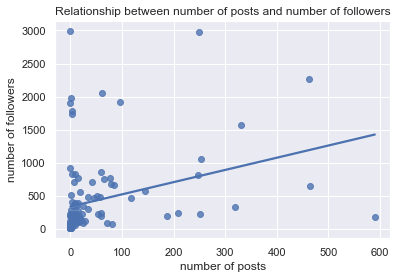

In [6]:
sns.regplot(x='number_of_posts', y='number_of_followers', data=df, ci=False)
plt.xlabel('number of posts')
plt.ylabel('number of followers')
plt.title('Relationship between number of posts and number of followers')
plt.show()

**b)** In your scatterplot, you selected one variable to plot on the x-axis and one variable to plot on the y-axis.  Explain how you made this decision.

I thought a number of posts and a number of followers would be proportional. As a number of posts increases, a number of followers would increase.

Maybe instagram accounts with more posts uploaded would be more active accounts, which would gather more followers.

**c)** Describe the scatterplot.

The scatterplot itself doesn't show clear linear relationship between number of posts and number of followers, but the regression line shows the relationship of going up and to the right, therefore it is a positive relationship. 

The points of data do not perfectly fit on this line, so they don't have a strong relationship. I would call this relationship moderate weak. 

There are a few outliers. (accounts that have nearly no posts, but have over 1500 followers and account that has about 250 posts but has about 3,000 followers)

**d)** Is it appropriate to use the best fit line to summarize/model the data?

Maybe not, because I cannot see strong linear relationship(small correlation) between two variables. 

Most of the accounts had less than 100 posts, which made it hard to see a relationship between number of posts and number of followers. 

### 4.  Performing Inference

Next, we will assume that this dataset of Instagram accounts is a random sample of ALL Instagram accounts. We would like to learn more about the relationship between the two variables that you selected in Question 3 for ALL Instagram accounts. Specifically, we would like to determine if we have sufficient evidence to suggest that there is a linear relationship between these numerical variables *for all Instagram accounts*. More specifically, we would like to test if we have sufficient evidence to suggest that slope of the simple linear regression model is non-zero.

**To do this, we will create a 90% confidence interval for this population slope.**

**a)** Construct the 90% confidence interval below.

In [8]:
mean_x=df['number_of_posts'].mean()
print('Explanatory Variable Mean:',mean_x)

mean_y=df['number_of_followers'].mean()
print('Response Variable Mean:',mean_y)

Explanatory Variable Mean: 48.19642857142857
Response Variable Mean: 427.625


In [9]:
std_x=df['number_of_posts'].std()
print('Explanatory Variable Std:',std_x)

std_y=df['number_of_followers'].std()
print('Response Variable Mean:',std_y)

Explanatory Variable Std: 102.85324446530551
Response Variable Mean: 603.0260049223521


In [12]:
corr = df['number_of_posts'].corr(df['number_of_followers'])
print('Correlation:', corr)

Correlation: 0.31476929909083967


In [13]:
slope=corr*(std_y/std_x)
print('Slope:', slope)

Slope: 1.845484543435926


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('number_of_followers ~ number_of_posts', data=df).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,338.6792,60.047,5.640,0.000,219.680,457.679
number_of_posts,1.8455,0.531,3.478,0.001,0.794,2.897


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_followers   R-squared:                       0.099
Model:                             OLS   Adj. R-squared:                  0.091
Method:                  Least Squares   F-statistic:                     12.10
Date:                 Wed, 29 Mar 2023   Prob (F-statistic):           0.000724
Time:                         15:57:59   Log-Likelihood:                -869.60
No. Observations:                  112   AIC:                             1743.
Df Residuals:                      110   BIC:                             1749.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         338.6792     60.047      5.640      0.000     219.680     457.679
number_of_posts     1.8455      0.531      3.478      0.001       0.794       2.897
==============================================================================
Omnibus:                       71.388   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.340
Skew:                           2.326   Prob(JB):                     1.09e-62
Kurtosis:                       9.284   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from scipy.stats import t
n=df.shape[0]
critical_value=t.ppf(1-0.05, df=n-1-1)
print('Critical Value',critical_value)

Critical Value 1.6588241874019427


In [21]:
point_estimate=1.8455
print('Point Estimate (sample slope):', point_estimate)
standard_error=0.531
print('Standard Error (of sample slopes):', standard_error)

lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval:', lower_bound, upper_bound)

Point Estimate (sample slope): 1.8455
Standard Error (of sample slopes): 0.531
90% Confidence Interval: 0.9646643564895683 2.7263356435104313


**b)** Based on the confidence interval, is it reasonable to say that the slope of your simple linear regression model is non-zero.  Explain.

Since a value '0' is within the 90% confidence interval (0.9647, 2.7263), it is unreasonable to say the slope of my simple linear regression model is zero. 

**c)** Check the assumptions for the simple linear regression model.

In [23]:
n= df.shape[0]
n

112

Our sample of instagram is randomly sampled and sample size = 112 < 10% of all instagram users. 